# PCA

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('Iris.csv')
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Getting Matrix And True Labels

In [3]:
originaldata = np.array([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3]])
X = np.array([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3]])
x_means = np.array([(df.iloc[:,i].mean()) for i in range(4)])


In [4]:
Y = np.array(df.iloc[:,-1])
# Y

In [5]:
def Corrected_outliers(X_):
    for i in range(4):
        Q1 = np.percentile(X_[i],25)
        Q2 = np.percentile(X_[i],50)
        Q3 = np.percentile(X_[i],75)
        lower = Q1 - 1.5*(Q3-Q1)
        upper = Q3 + 1.5*(Q3-Q1)

        for j in range(len(X_[i])):
            if X_[i][j]<lower or X_[i][j]>upper: X_[i][j] = Q2 

        return X_

X = Corrected_outliers(X) 
originaldata = Corrected_outliers(originaldata)

In [6]:

def Mean_sub(X_):
    for i in range(len(X_)):
        X_[i] = X_[i] - np.mean(X_[i])
    return X_

X = Mean_sub(X)

In [7]:
Covariance_Mat = np.dot(X,X.T)/150
Covariance_Mat 
# divided by no. of terms

array([[ 0.68112222, -0.03900667,  1.26519111,  0.51345778],
       [-0.03900667,  0.18675067, -0.319568  , -0.11719467],
       [ 1.26519111, -0.319568  ,  3.09242489,  1.28774489],
       [ 0.51345778, -0.11719467,  1.28774489,  0.57853156]])

In [8]:
np.cov([X[0],X[1],X[2],X[3]])

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [9]:
eigenval,eigenvec = np.linalg.eig(Covariance_Mat)

In [10]:
eigenval

array([4.19667516, 0.24062861, 0.07800042, 0.02352514])

In [11]:
real_eig = eigenvec.T
real_eig

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [12]:
Top2ev = real_eig[0:2]
Top2ev

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [13]:
Final_data = np.dot(originaldata.T,Top2ev.T)                                  

In [14]:
Data = pd.DataFrame(Final_data,columns=['PC1','PC2'])
Data['Species'] = df['Species']

In [15]:
Data

,PC1,PC2,Species
0,2.827136,-5.641331,Iris-setosa
1,2.795952,-5.145167,Iris-setosa
2,2.621524,-5.177378,Iris-setosa
3,2.764906,-5.003599,Iris-setosa
4,2.782750,-5.648648,Iris-setosa
...,...,...,...
145,7.455360,-5.502139,Iris-virginica
146,7.037007,-4.939703,Iris-virginica
147,7.275389,-5.393243,Iris-virginica
148,7.412972,-5.430600,Iris-virginica


## Plot

In [16]:
soa = np.array([[0, 0, eigenval[0] * Top2ev[0][0], eigenval[0] * Top2ev[0][1]]])
soa1 = np.array([[0, 0, eigenval[1] * Top2ev[1][0], eigenval[1] * Top2ev[1][1]]])
x0, y0, u0, v0 = zip(*soa)
x1, y1, u1, v1 = zip(*soa1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
DataScaled = sc.fit_transform(Data.iloc[:,:2])
DataScaled = pd.DataFrame(DataScaled,columns=["PC1","PC2"])


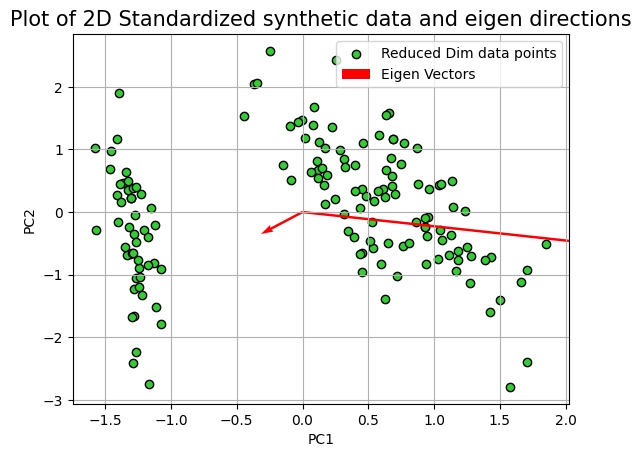

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(DataScaled["PC1"],DataScaled["PC2"],color="limegreen",edgecolors='black',label='Reduced Dim data points')
plt.title('Plot of 2D Standardized synthetic data and eigen directions',fontsize=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.quiver(0,0, eigenval[0] * Top2ev[0][0], eigenval[0] * Top2ev[0][1], angles='xy', scale_units='xy',color='red', scale=0.5, width=0.005)
plt.quiver(0,0, eigenval[1] * Top2ev[1][0], eigenval[1] * Top2ev[1][1], angles='xy', scale_units='xy',color='red', scale=0.5, width=0.005, label='Eigen Vectors')
plt.grid()
plt.legend()
plt.show()

## Reconstruction

In [18]:
X_new = Data.iloc[:,:2]
Q = Top2ev
X_reconstructed = np.dot(X_new,Q)

In [19]:
X_reconstructed = pd.DataFrame(X_reconstructed,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
X_reconstructed['Species'] = df['Species']
X_reconstructed

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.726022,3.883964,1.430084,0.593057,Iris-setosa
1,4.388995,3.524472,1.490582,0.618933,Iris-setosa
2,4.347071,3.562327,1.335510,0.553934,Iris-setosa
3,4.284824,3.423723,1.488872,0.618368,Iris-setosa
4,4.714777,3.892955,1.390778,0.576582,Iris-setosa
...,...,...,...,...,...
145,6.308155,3.401635,5.418957,2.264265,Iris-virginica
146,5.787621,3.025636,5.159465,2.156159,Iris-virginica
147,6.171585,3.336978,5.283939,2.207819,Iris-virginica
148,6.245860,3.352919,5.395223,2.254399,Iris-virginica


In [20]:
def RMSE():
    for i in range(4):
        error = np.array(df.iloc[:,i]) - np.array(X_reconstructed.iloc[:,i])
        error_sq = np.square(error)
        sum_error_sq = pow((np.sum(error_sq)/len(df)) , 0.5)
        print(f"RMSE for {df.columns[i]} = {sum_error_sq}")

RMSE()

RMSE for SepalLengthCm = 0.3989164667189961
RMSE for SepalWidthCm = 0.409530408111956
RMSE for PetalLengthCm = 0.0813043789800091
RMSE for PetalWidthCm = 0.4274481349264649


# KNN

In [21]:
data = Data.copy(deep=True)
data

,PC1,PC2,Species
0,2.827136,-5.641331,Iris-setosa
1,2.795952,-5.145167,Iris-setosa
2,2.621524,-5.177378,Iris-setosa
3,2.764906,-5.003599,Iris-setosa
4,2.782750,-5.648648,Iris-setosa
...,...,...,...
145,7.455360,-5.502139,Iris-virginica
146,7.037007,-4.939703,Iris-virginica
147,7.275389,-5.393243,Iris-virginica
148,7.412972,-5.430600,Iris-virginica


In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data.iloc[:,:2],data.iloc[:,-1],test_size=0.3,random_state=104,shuffle=True)

In [23]:
def Euclidean_Distance(A,B):
    return pow(pow(A-B,2).sum(),0.5)

In [24]:
d_xtest = []

for i in range(len(xtest)):
    temp = []
    for j in range(len(xtrain)):
        temp.append([Euclidean_Distance(np.array(xtrain.iloc[j]),np.array(xtest.iloc[i])),ytrain.iloc[j]])
    temp.sort(key = lambda temp: temp[0])
    d_xtest.append(temp[:5])

d_xtest = np.array(d_xtest)
print(f"Shape Train: {xtrain.shape}, Test Shape: {xtest.shape}, Final Distances: {d_xtest.shape}")
d_xtest


Shape Train: (105, 2), Test Shape: (45, 2), Final Distances: (45, 5, 2)


array([[['0.1583748729893346', 'Iris-setosa'],
        ['0.20471614835191518', 'Iris-setosa'],
        ['0.21418817706711973', 'Iris-setosa'],
        ['0.22220961017457103', 'Iris-setosa'],
        ['0.2500834393669895', 'Iris-setosa']],

       [['0.45154587071906765', 'Iris-setosa'],
        ['0.452456448945663', 'Iris-setosa'],
        ['0.4552051709900851', 'Iris-setosa'],
        ['0.5008469291940087', 'Iris-setosa'],
        ['0.5057964293737677', 'Iris-setosa']],

       [['0.07495276600191622', 'Iris-setosa'],
        ['0.1269931353573476', 'Iris-setosa'],
        ['0.1543174274996209', 'Iris-setosa'],
        ['0.21943564339557603', 'Iris-setosa'],
        ['0.28282258861281745', 'Iris-setosa']],

       [['0.1742952365094013', 'Iris-versicolor'],
        ['0.31559447113124905', 'Iris-versicolor'],
        ['0.395293576721706', 'Iris-versicolor'],
        ['0.41716798711796255', 'Iris-versicolor'],
        ['0.42601511707159656', 'Iris-versicolor']],

       [['0.198022283865

In [25]:
import statistics as stat
predicted= np.array([stat.mode(d_xtest[i][:,1]) for i in range(len(d_xtest))])

In [26]:
Final = np.array([predicted,ytest]).T
Final_DF = pd.DataFrame(Final,columns=['Predicted','Actual'])
Final_DF

,Predicted,Actual
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-setosa,Iris-setosa


In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
CM = confusion_matrix(ytest,predicted)
CM

array([[20,  0,  0],
       [ 0, 17,  0],
       [ 0,  0,  8]], dtype=int64)

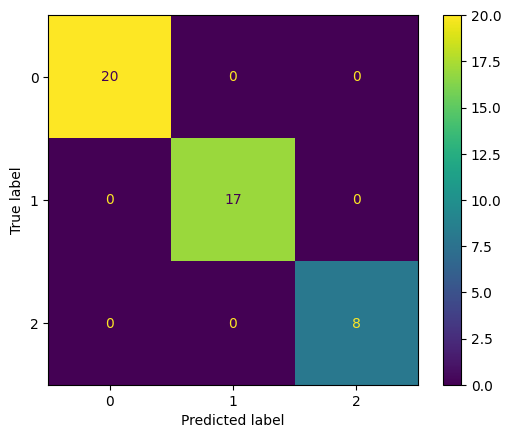

In [28]:
ConfusionMatrixDisplay(CM).plot()